# <center><strong><font color='grey'>Creating a Chatbot</font></strong></center>






<center><img src="https://rockcontent.com/wp-content/uploads/2021/11/types-of-chatbots.png" height=1000></center>




---------------

## Importing Libraries


In [2]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

## Importing Data

In [3]:
f = open("dialogs.txt", "r")
print(f.read())


hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

_____

* Reading data from txt file the txt file contains tab seprated data.

* Here I have created a dataframe by adding two columns 'Query' and 'Response' and will load data.

In [4]:
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


## Understanding Data 

In [5]:
df.shape

(3725, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [7]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [8]:
df.nunique()

Query       3510
Response    3512
dtype: int64

### Checking Null Values

In [9]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [10]:
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [11]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

## Data Visualization using WorldCloud

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
Text=df['Query']

In [14]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss: 
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
neg: 0.0, neu: 0.704, pos: 0.2

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what does she look like, though?
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
she has pretty light brown eyes.
neg: 0.0, neu: 0.61, pos: 0.39, compound: 0.4939, 
i may know which girl you're talking about.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so you have seen her around?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
there's a new girl in school, have you seen her yet?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i haven't seen her yet.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i think that she is very pretty.
neg: 0.0, neu: 0.589, pos: 0.411, compound: 0.5413, 
tell me how she looks.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she's kind of short.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what height is she?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she's probably about five feet.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's nice, but tell me what she looks like.
neg: 0.0, neu: 0.576, pos: 0.424, comp

neg: 0.0, neu: 0.423, pos: 0.577, compound: 0.6249, 
what was the score at the end of the game?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
our team won 101-98.
neg: 0.0, neu: 0.448, pos: 0.552, compound: 0.5719, 
sounds like it was a close game.
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
that's the reason it was such a great game.
neg: 0.0, neu: 0.631, pos: 0.369, compound: 0.6249, 
i was meaning to ask you if you saw the basketball game on friday.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i wanted to go, but i couldn't.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it was a great game.
neg: 0.0, neu: 0.423, pos: 0.577, compound: 0.6249, 
it's too bad that i couldn't make it. who won?
neg: 0.246, neu: 0.493, pos: 0.261, compound: 0.0516, 
our team played hard and won.
neg: 0.133, neu: 0.286, pos: 0.581, compound: 0.6908, 
i really wish i went to the game.
neg: 0.0, neu: 0.626, pos: 0.374, compound: 0.4576, 
it was the best game ever.
neg: 0.0, neu: 0.543, pos: 0.457, c

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nothing, how about you?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
next saturday, i'm going to have a party.
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.4019, 
oh, really?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you are coming?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
probably not.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't feel like going.
neg: 0.413, neu: 0.587, pos: 0.0, compound: -0.2755, 
why not?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i really can't stand going to parties.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
i understand, i guess.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's happening?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
not a lot, what about you?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm having a party next saturday.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
that's nice.
neg: 0.0, neu: 0.263

nothing.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
there must be something on tv!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nothing that's interesting.
neg: 0.53, neu: 0.47, pos: 0.0, compound: -0.3089, 
what about that new game show?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
which one?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
deal or no deal
neg: 0.423, neu: 0.577, pos: 0.0, compound: -0.296, 
tell me you're joking.
neg: 0.0, neu: 0.612, pos: 0.388, compound: 0.2263, 
i love that show.
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.6369, 
i watched it once. that was enough.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i like living here.
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.3612, 
i agree. pasadena is a nice city.
neg: 0.0, neu: 0.361, pos: 0.639, compound: 0.6486, 
it's not too big.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and it's not too small.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it has great weather all year long.
neg: 0.0, neu: 0.594, pos:

neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
no one knows what happens after we die.
neg: 0.504, neu: 0.496, pos: 0.0, compound: -0.7269, 
if we are good, we will be happy in heaven with god.
neg: 0.0, neu: 0.4, pos: 0.6, compound: 0.9001, 
that's what many people believe.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
if we are bad, we will be unhappy forever in hell.
neg: 0.577, neu: 0.423, pos: 0.0, compound: -0.8979, 
i don't want to go to hell.
neg: 0.593, neu: 0.407, pos: 0.0, compound: -0.7024, 
my husband died.
neg: 0.643, neu: 0.357, pos: 0.0, compound: -0.5574, 
i'm sorry for you.
neg: 0.302, neu: 0.698, pos: 0.0, compound: -0.0772, 
thank you.
neg: 0.0, neu: 0.286, pos: 0.714, compound: 0.3612, 
when did he die?
neg: 0.565, neu: 0.435, pos: 0.0, compound: -0.5994, 
a couple of months ago.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you still miss him.
neg: 0.348, neu: 0.652, pos: 0.0, compound: -0.1531, 
yes, but i talk to him almost every day.
neg: 0.0, neu: 0.791,

neg: 0.206, neu: 0.794, pos: 0.0, compound: -0.0772, 
you won't catch me, because i love you. i'm not a cheater.
neg: 0.0, neu: 0.532, pos: 0.468, compound: 0.7935, 
i will poke your eyes out. 
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't want any other woman.
neg: 0.234, neu: 0.766, pos: 0.0, compound: -0.0572, 
i will chop your toes off, one by one.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i hate to go outside.
neg: 0.552, neu: 0.448, pos: 0.0, compound: -0.5719, 
me too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why do you hate to go outside?
neg: 0.381, neu: 0.619, pos: 0.0, compound: -0.5719, 
i meet too many jerks.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.2732, 
i agree.
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.3612, 
this city is full of jerks.
neg: 0.296, neu: 0.704, pos: 0.0, compound: -0.2732, 
rude people are everywhere.
neg: 0.5, neu: 0.5, pos: 0.0, compound: -0.4588, 
but what can you do?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you can yell a

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lucky for you it wasn't a sharp knife.
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.4215, 
who carries a sharp knife in their pocket?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
criminals, of course.
neg: 0.649, neu: 0.351, pos: 0.0, compound: -0.5719, 
anyway, i have to fix the hole.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you can sew it up or use an iron-on patch.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me about this patch.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the patch has glue. the hot iron melts the glue so the patch sticks on.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that sounds a lot easier than sewing.
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
do you know any good jokes?
neg: 0.0, neu: 0.449, pos: 0.551, compound: 0.5994, 
i can't remember jokes.
neg: 0.465, neu: 0.535, pos: 0.0, compound: -0.1877, 
neither can i.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they go in one ear and out th

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
english.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what are you going to do with an english major?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm going to be a teacher.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
high school or middle school?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
high school.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i teach high school english.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i didn't know that.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i started teaching five years ago.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how do you like it?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
do you see all this gray hair? it was totally black five years ago.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
parking at school is impossible.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll say.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i drove around for half an hour.
neg: 0.0, neu: 1.0, 

neg: 0.516, neu: 0.484, pos: 0.0, compound: -0.4939, 
i sure hope not.
neg: 0.0, neu: 0.161, pos: 0.839, compound: 0.6369, 
look at this traffic.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'd rather not.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it gets worse every year.
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
why are you complaining? we're going almost 20 miles an hour.
neg: 0.153, neu: 0.847, pos: 0.0, compound: -0.2023, 
the speed limit is 65!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, that's between 2:00 and 4:00 a.m.
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.2732, 
where are all these people going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're all asking the same question.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
when are they going to fix this problem?
neg: 0.309, neu: 0.691, pos: 0.0, compound: -0.481, 
they said they need more money.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they always need more money.
neg: 0.0, neu: 1.0, pos

neg: 0.522, neu: 0.478, pos: 0.0, compound: -0.656, 
they shouldn't even call it news.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
last night they told us about a cat in a sofa.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yesterday they told us about a dog in a pipe.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
last week they told us about a bear in a back yard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
last month they told us about a mouse in a restaurant.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the weatherman tells us the temperature in every town.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the sports guy shows us players fighting.
neg: 0.294, neu: 0.706, pos: 0.0, compound: -0.3612, 
they always tell us "what's next."
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they always make "what's next" sound exciting, but it never is.
neg: 0.0, neu: 0.826, pos: 0.174, compound: 0.2732, 
it's more like news for kids.
neg: 0.0, neu: 0.642, pos: 0.358, compound: 0.4201, 
i lov

neg: 0.361, neu: 0.639, pos: 0.0, compound: -0.3089, 
then why were you looking at her?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i was looking at something else.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
would you like to go on a blind date?
neg: 0.241, neu: 0.536, pos: 0.223, compound: -0.0516, 
you must be joking.
neg: 0.0, neu: 0.612, pos: 0.388, compound: 0.2263, 
no, i'm serious.
neg: 0.778, neu: 0.222, pos: 0.0, compound: -0.3612, 
i don't want to date a blind woman.
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.4445, 
a blind date doesn't mean that she is blind!
neg: 0.487, neu: 0.513, pos: 0.0, compound: -0.69, 
what does it mean?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a blind date is a date with someone you don't know.
neg: 0.252, neu: 0.748, pos: 0.0, compound: -0.4019, 
why would i date someone i don't even know?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
to try something new and exciting.
neg: 0.0, neu: 0.61, pos: 0.39, compound: 0.4939, 
what if i don't

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. it gets a little cool at night.
neg: 0.0, neu: 0.515, pos: 0.485, compound: 0.5729, 
bring a glove to catch a foul ball.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
golf is a silly game.
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.0258, 
it certainly is.
neg: 0.0, neu: 0.455, pos: 0.545, compound: 0.34, 
you hit a white ball.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and then you chase it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and then you hit it again.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
finally, you put the ball into a hole in the ground.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you do this 18 times, because there are 18 holes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's the point?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how can it be fun?
neg: 0.0, neu: 0.548, pos: 0.452, compound: 0.5106, 
they pay money to play this silly game!
neg: 0.137, neu: 0.489, pos: 0.374, compound: 0.3436, 
i t

neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.3818, 
if they are all outside, then what?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have to go back upstairs.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why? we're already late.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have to check the stove.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's the matter?
neg: 0.0, neu: 0.645, pos: 0.355, compound: 0.0258, 
maybe i left the burner on.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, you didn't. i checked the stove before we left.
neg: 0.216, neu: 0.784, pos: 0.0, compound: -0.296, 
are you sure?
neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
of course i'm sure.
neg: 0.0, neu: 0.566, pos: 0.434, compound: 0.3182, 
well, i have to go back upstairs anyway.
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.2732, 
it's getting later every minute.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i think i left the water running.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the

neg: 0.0, neu: 0.686, pos: 0.314, compound: 0.4939, 
why didn't you take a nap when you got home?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i didn't get home until 30 minutes ago.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
there was a bomb threat at the airport.
neg: 0.569, neu: 0.431, pos: 0.0, compound: -0.765, 
only a threat?
neg: 0.773, neu: 0.227, pos: 0.0, compound: -0.5267, 
yes, but i was stuck there all day while they looked for the bomb.
neg: 0.126, neu: 0.504, pos: 0.37, compound: 0.705, 
my dad went to washington, d.c.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why did he do that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he was invited, along with about 90 other veterans.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
who invited them?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
some private organization.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why did they invite him?
neg: 0.0, neu: 0.714, pos

neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.4404, 
how do you prepare the potatoes?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i wash them, and then steam them for 15 minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's pretty simple.
neg: 0.0, neu: 0.385, pos: 0.615, compound: 0.4939, 
then i add butter, salt, and pepper.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my girlfriend's mom got mad at me at the dinner table.
neg: 0.242, neu: 0.758, pos: 0.0, compound: -0.4939, 
why was that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i sprinkled salt and pepper on the food before i tasted it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's the matter with that?
neg: 0.0, neu: 0.784, pos: 0.216, compound: 0.0258, 
her mom is a great cook.
neg: 0.0, neu: 0.494, pos: 0.506, compound: 0.6249, 
so, a little salt and pepper never hurt anything.
neg: 0.0, neu: 0.716, pos: 0.284, compound: 0.4168, 
it hurt her feelings.
neg: 0.531, neu: 0.469, pos: 0.0, compound: -0.5267, 
o

yes, even though some of the potatoes had eyes.
neg: 0.0, neu: 0.748, pos: 0.252, compound: 0.4019, 
just put them in the fridge.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
also, i bought a can of cheap coffee and a bag of good coffee.
neg: 0.0, neu: 0.775, pos: 0.225, compound: 0.4404, 
why did you do that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i mixed them together.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i really like this house.
neg: 0.0, neu: 0.518, pos: 0.482, compound: 0.4201, 
can we afford it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they want 20 percent down.
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.0772, 
that's a lot of money.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but the house is so nice.
neg: 0.0, neu: 0.504, pos: 0.496, compound: 0.7118, 
it's in a great neighborhood.
neg: 0.0, neu: 0.423, pos: 0.577, compound: 0.6249, 
it's close to the beach.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's close to the freeways.
neg: 0.0, neu: 1.0,

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because that gets the blood out of the shirt.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's a little blood?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
your white shirt is ruined.
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
so, i'll just buy another one.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you can wear this one around the house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my fingers hurt.
neg: 0.63, neu: 0.37, pos: 0.0, compound: -0.5267, 
why do they hurt?
neg: 0.531, neu: 0.469, pos: 0.0, compound: -0.5267, 
i type too much.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you should take a break.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i need to type to make money.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but typing is causing you pain.
neg: 0.471, neu: 0.529, pos: 0.0, compound: -0.6652, 
maybe i should see a doctor.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
doctors are too expensive.
neg: 0.0,

In [16]:
# Creating a dataframe.

analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)


In [17]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [18]:
from wordcloud import WordCloud

In [19]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",mode='RGB',max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    


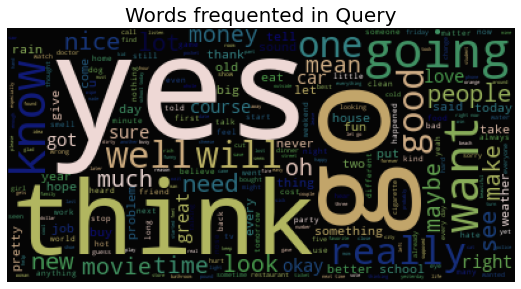

In [22]:
wordcloud(df,'Query')
# top words in the query column

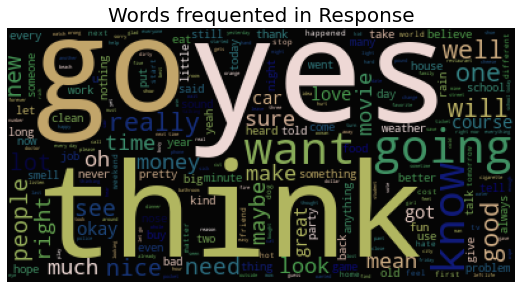

In [23]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [24]:
import re

In [25]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [26]:
remove_n = lambda x: re.sub("\n", " ", x)

In [27]:
# removing non ascii characters

remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

In [28]:
# removing alpha numeric values

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [29]:
# using map function and applying the function on query column

df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [30]:
# using map function and applying the function on response column

df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [31]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


### Checking for Important Sentence

In [32]:
# arranging the compound column in descending order to find the best sentence. 

imp_sent=df.sort_values(by='compound', ascending=False)

In [33]:
imp_sent.head(5)

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


### Top Positive Sentence

In [34]:
pos_sent=df.sort_values(by='pos', ascending=False)

In [35]:
pos_sent.head(5)

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


### Top Negative Sentence

In [36]:
neg_sent=df.sort_values(by='neg', ascending=False)

In [37]:
neg_sent.head(5)

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


### Top Neutral Sentence

In [38]:
neu_sent=df.sort_values(by='neu', ascending=False)

In [39]:
neu_sent.head(5)

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tfidf = TfidfVectorizer()

In [42]:
factors = tfidf.fit_transform(df['Query']).toarray()

In [43]:
tfidf.get_feature_names()

['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

# Application Part

`cosine_distances` Compute cosine distance between samples in X and Y.

Cosine distance is defined as 1.0 minus the cosine similarity.

In [44]:
from sklearn.metrics.pairwise import cosine_distances

In [45]:
query = 'who are you ?'
def chatbot(query):
    query = nu.lemmatization_sentence(query)
    query_vector = tfidf.transform([query]).toarray()
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [46]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER: hi
logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 68.06 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i m fine  how about yourself 
USER: fine
logs:
 Matched Question: 'fine  what s going on with you '
 Confidence Score: 65.29 
 PositiveScore: 0.265 
 NegativeScore: 0.0
 NeutralScore: 0.735
BOT:  i m having a party this friday 
USER: nice
logs:
 Matched Question: 'that s nice '
 Confidence Score: 85.17 
 PositiveScore: 0.737 
 NegativeScore: 0.0
 NeutralScore: 0.263
BOT:  are you going to be there 
USER: yeah
logs:
 Matched Question: 'she loves you  yeah  yeah  yeah    '
 Confidence Score: 89.94 
 PositiveScore: 0.737 
 NegativeScore: 0.0
 NeutralScore: 0.263
BOT:   and you know you should be glad 
USER: why
logs:
 Matched Question: 'why '
 Confidence Score: 100.00 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  to show respect to god and others 
USER: ok
BOT: Please rephrase your Question.
USER: okay
logs:
 Matched Qu